In [37]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords

In [44]:
dataset = pd.read_csv(r'TheArticles.csv')
dataset

,Comment,Sentiment
0,"The continuing demolitions in Wadi Hummus, and...",negative
1,"\nThe US has listed Afghanistan, India, and Pa...",negative
2,"Today, in a world where food worth more than $...",negative
3,The federal government’s decision to establish...,negative
4,PESHAWAR: Afghanistan on Friday closed its con...,negative
...,...,...
195,"BE prepared, Pakistan! Imran Khan’s government...",negative
196,"ON July 29, Narendra Modi’s government unveile...",negative
197,WINSTON Churchill was a terrible man. He autho...,negative
198,A TURKISH drama series brimming with tribal in...,negative


In [39]:
dataset.head()

,Comment,Sentiment
0,"The continuing demolitions in Wadi Hummus, and...",negative
1,"\nThe US has listed Afghanistan, India, and Pa...",negative
2,"Today, in a world where food worth more than $...",negative
3,The federal government’s decision to establish...,negative
4,PESHAWAR: Afghanistan on Friday closed its con...,negative


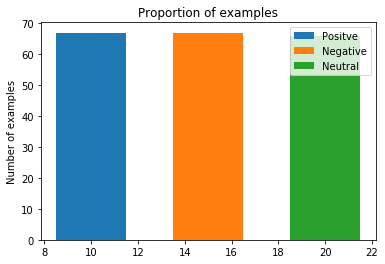

In [40]:
Pos = dataset[dataset['Sentiment'] == 'positive'].shape[0]
Neg = dataset[dataset['Sentiment'] == 'negative'].shape[0]
Neu = dataset[dataset['Sentiment'] == 'neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [42]:
y=dataset.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)

In [43]:
stopWords = set(stopwords.words('english'))
stopWords.update(['"', "'", ':', '(', ')', '[', ']', '{', '}'])

In [71]:
corpus=[]
stopWords= {'i','a','and','about','an','are','as','at','be','by','com','for','from','how','in','is','it','not','of','on','or','that','the','this','to','was','what','when','where','who','will','with','the','www','your','is','am','some','you','your','I','A','And','About','An','Are','As','At','Be','By','Com','For','From','How','In','Is','It','Not','Of','On','Or','That','The','This','To','Was','What','When','Where','Who','Will','With','The','Www','Your','Is','Am','Some','You','Your','Was'}
for i in range(0,200):
    review = re.sub('[^a-zA-Z]',' ',dataset.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopWords]
    review=' '.join(review)
    corpus.append(review)
corpus

['continuing demolitions wadi hummus most recently case khirbet humsa underline need create additional tools put disposal palestinians better record then challenge damage being wrought upon them they reinforce need document expose costs colonisation international stage should go beyond measuring just transactional economic costs gross domestic product gdp gross national income gni israeli occupation which world bank already doing because such economy focused efforts ignore human context united nations conference trade development unctad united nations economic social commission western asia un escwa recently took important steps document expose real cost israel s colonialism occupation yet these efforts need expanded includes reaching out more countless palestinian analysts better equipped measure these costs than outside experts efforts document expose all costs israel s colonialism should also include recording sharing personalised experiences its victims any accounting ignores psych

In [72]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [74]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred=classifier.predict(x_test)

In [77]:
cm=confusion_matrix(y_test,y_pred)

In [78]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.5 


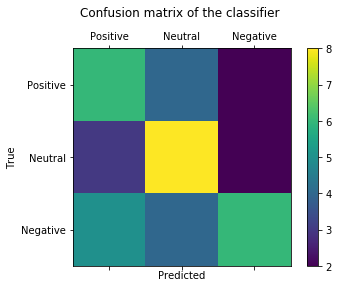

In [79]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()